In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [13]:
df = data.copy()

In [16]:
df.value_counts('class')

class
e    4208
p    3916
dtype: int64

In [12]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

/tmp/ipykernel_4735/474805533.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


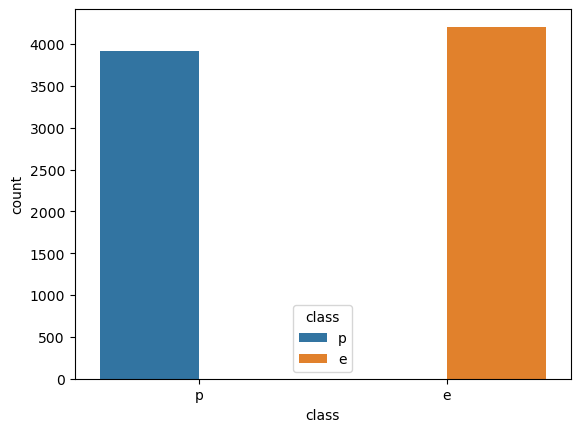

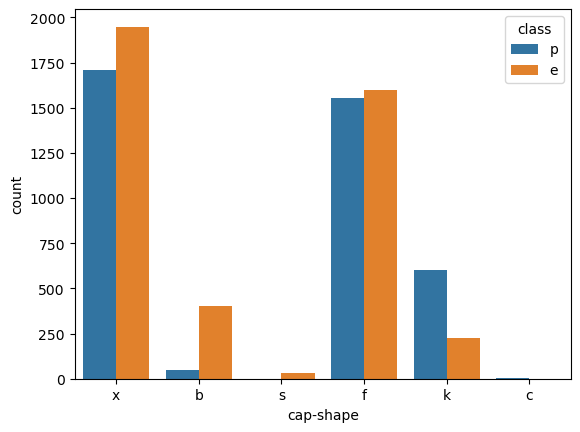

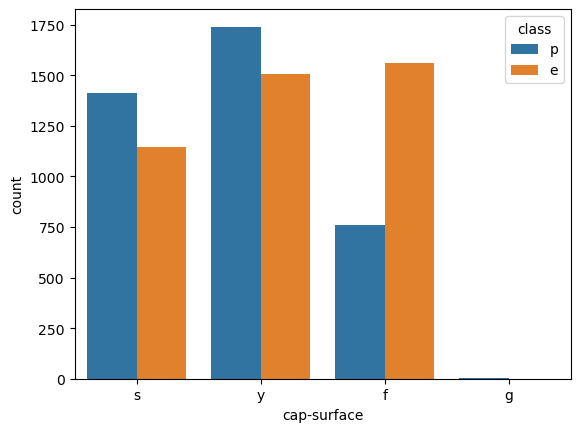

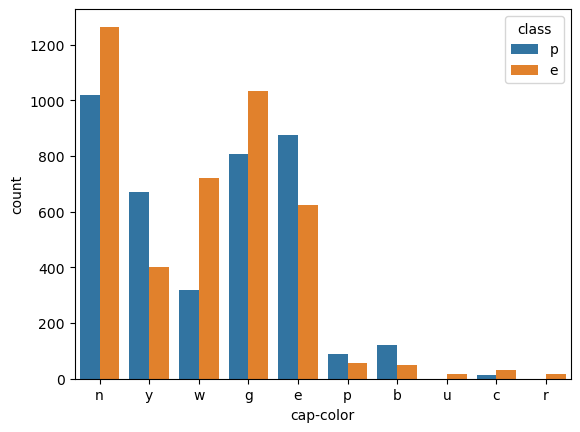

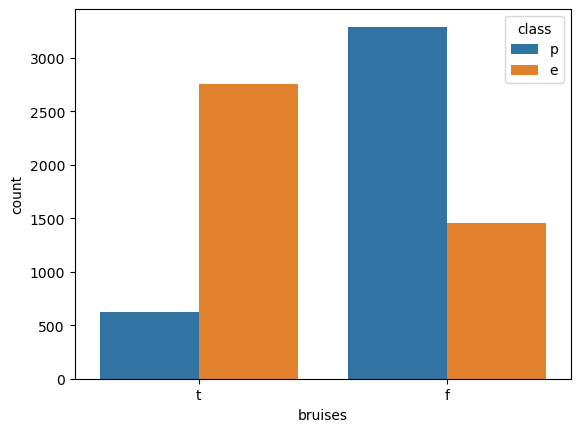

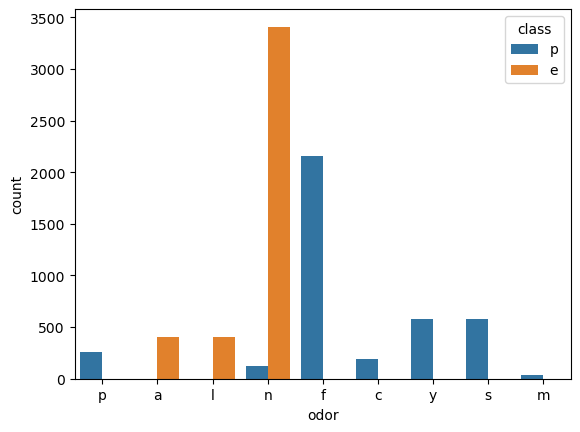

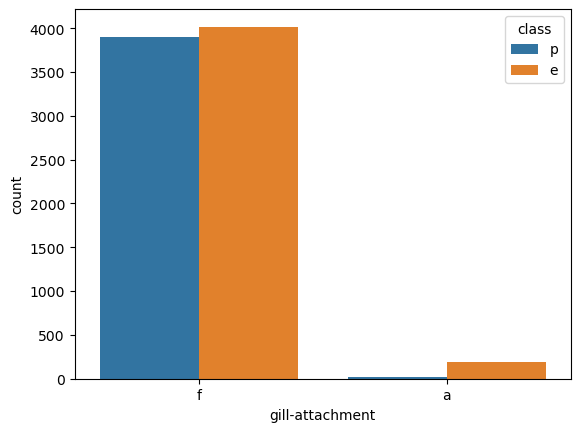

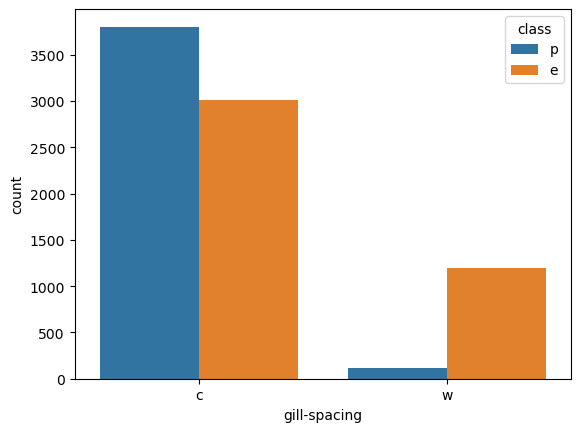

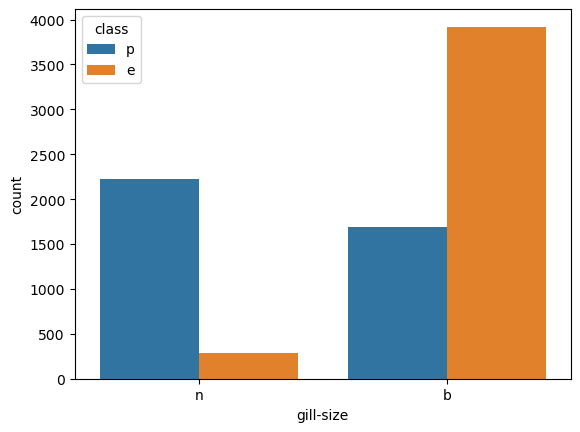

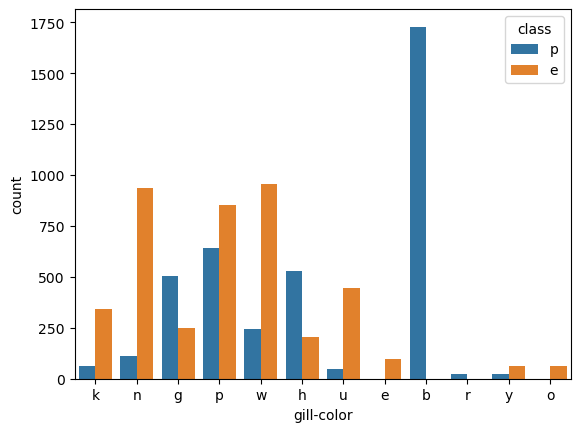

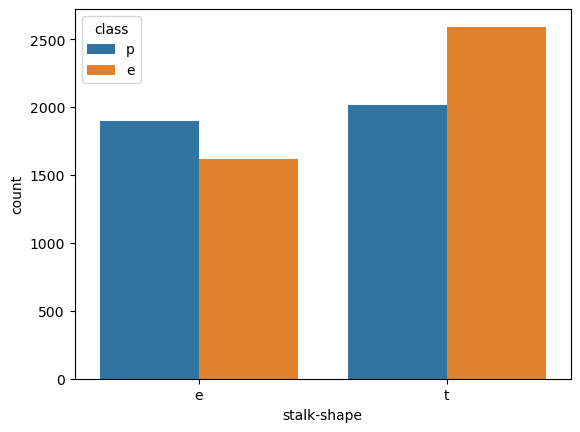

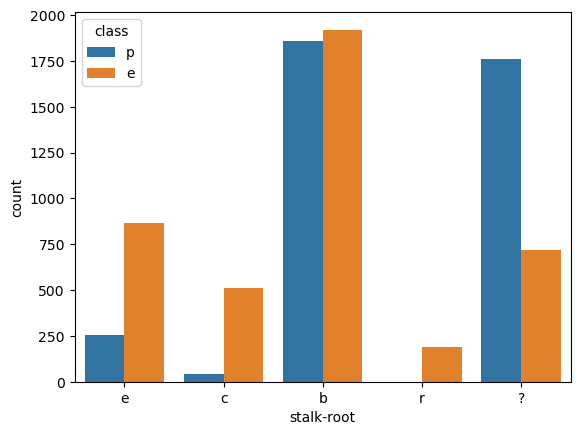

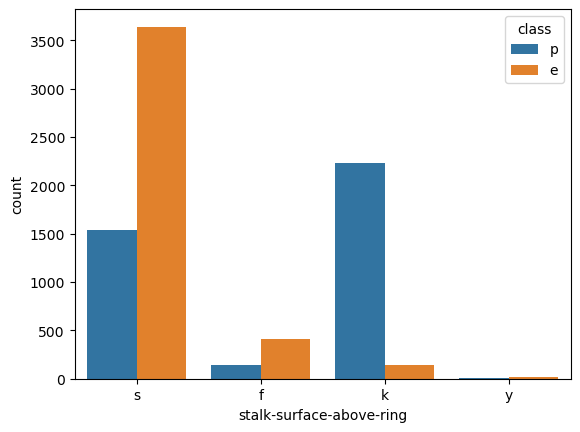

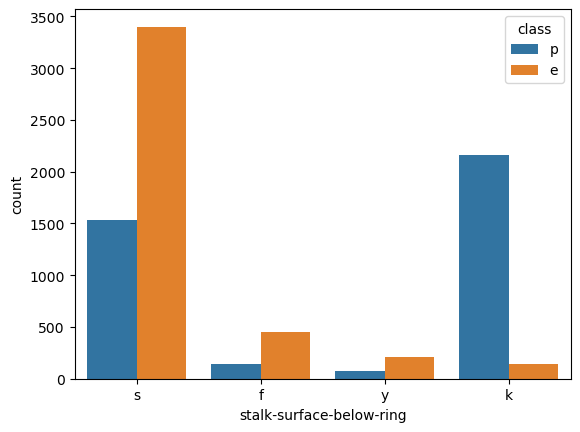

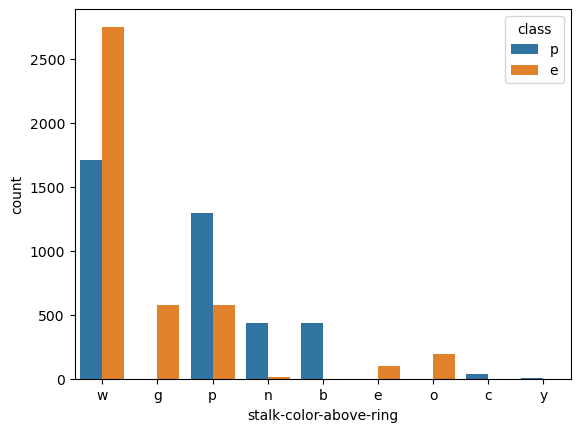

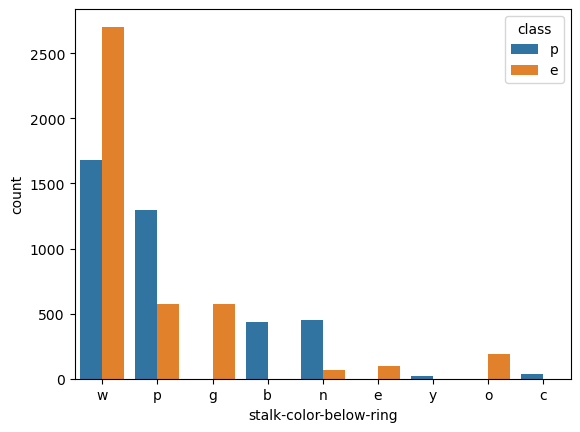

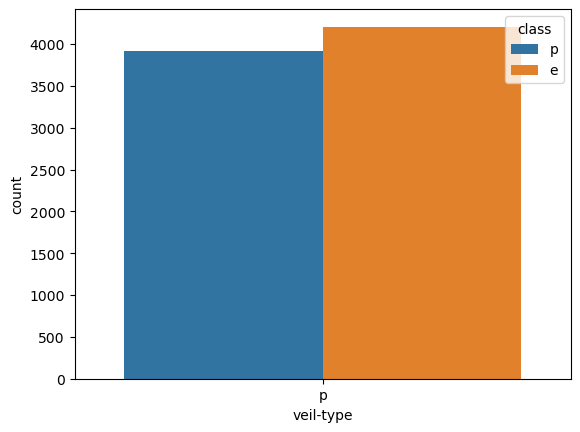

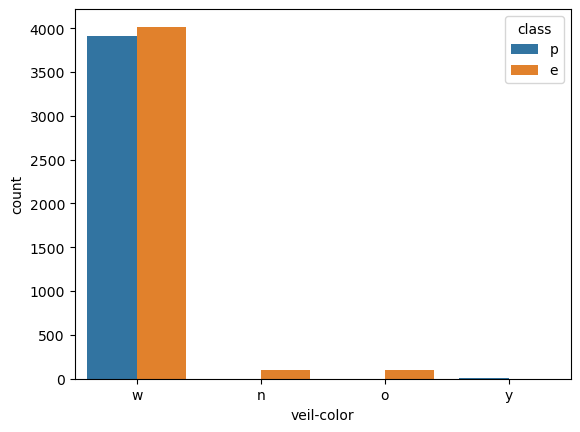

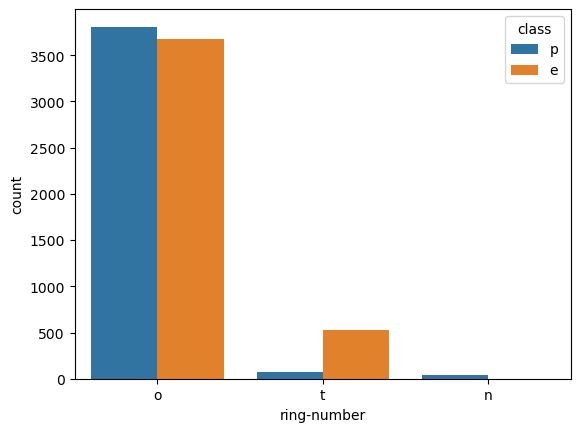

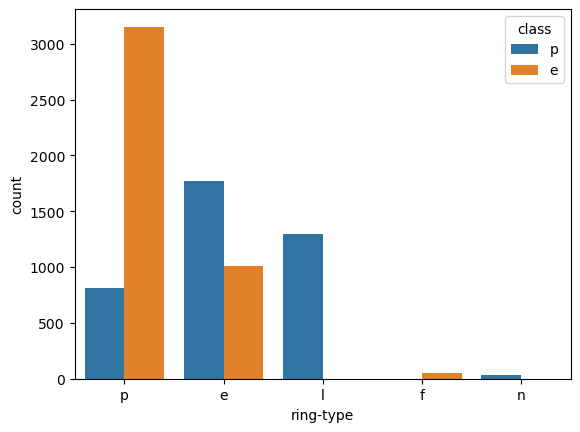

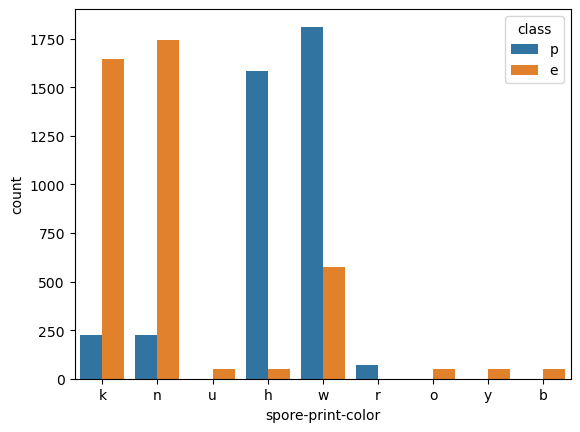

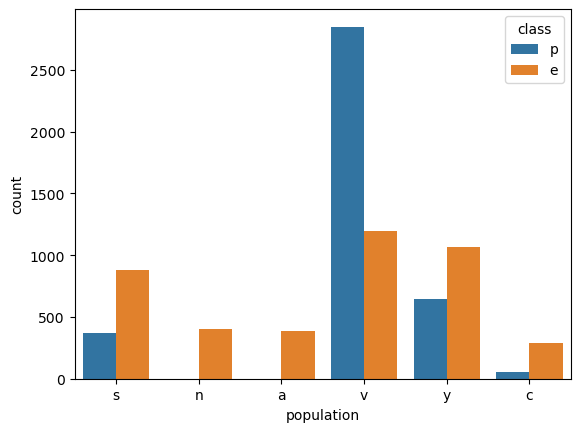

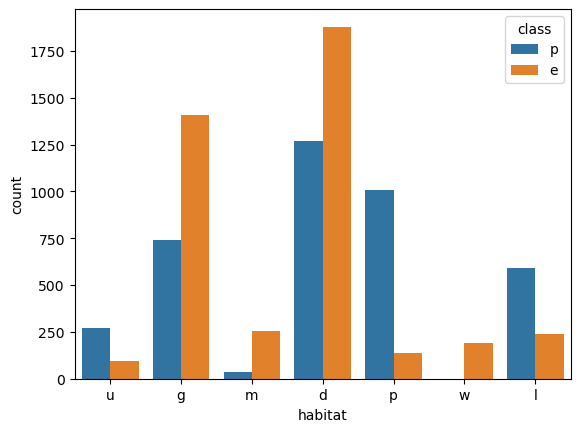

In [38]:
for col in df.columns:
    plt.figure()
    sns.countplot(x=df[col], hue=df['class'])

In [35]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

class--------------------------------------------- ['p' 'e']
cap-shape----------------------------------------- ['x' 'b' 's' 'f' 'k' 'c']
cap-surface--------------------------------------- ['s' 'y' 'f' 'g']
cap-color----------------------------------------- ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises------------------------------------------- ['t' 'f']
odor---------------------------------------------- ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment----------------------------------- ['f' 'a']
gill-spacing-------------------------------------- ['c' 'w']
gill-size----------------------------------------- ['n' 'b']
gill-color---------------------------------------- ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape--------------------------------------- ['e' 't']
stalk-root---------------------------------------- ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring-------------------------- ['s' 'f' 'k' 'y']
stalk-surface-below-ring-------------------------- ['s' 'f' 'y'

# Preprocessing

In [295]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve

In [296]:
df = data.copy()

In [297]:
y = df['class']
X = df.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [298]:
OHencoder = OneHotEncoder()
Lencoder = LabelEncoder()

In [299]:
def encodage(X_train, X_test, y_train, y_test):
    X_train = OHencoder.fit_transform(X_train).toarray()
    X_test = OHencoder.transform(X_test).toarray()
    y_train = Lencoder.fit_transform(y_train)
    y_test = Lencoder.transform(y_test)
    return X_train, X_test, y_train, y_test

In [300]:
def preprocessing(X_train, X_test, y_train, y_test):
    X_train, X_test, y_train, y_test = encodage(X_train, X_test, y_train, y_test)
    return X_train, X_test, y_train, y_test

In [301]:
X_train, X_test, y_train, y_test = preprocessing(X_train, X_test, y_train, y_test)

In [302]:
def evaluation(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [304]:
model_dict = {'DecisionsTree':DecisionTreeClassifier(random_state=0),
             'RandomForest':RandomForestClassifier(random_state=0),
             'AdaBoost':AdaBoostClassifier(random_state=0),
             'KNN':KNeighborsClassifier(),
             'SVC':SVC}

1.0
1.0
1.0
1.0


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

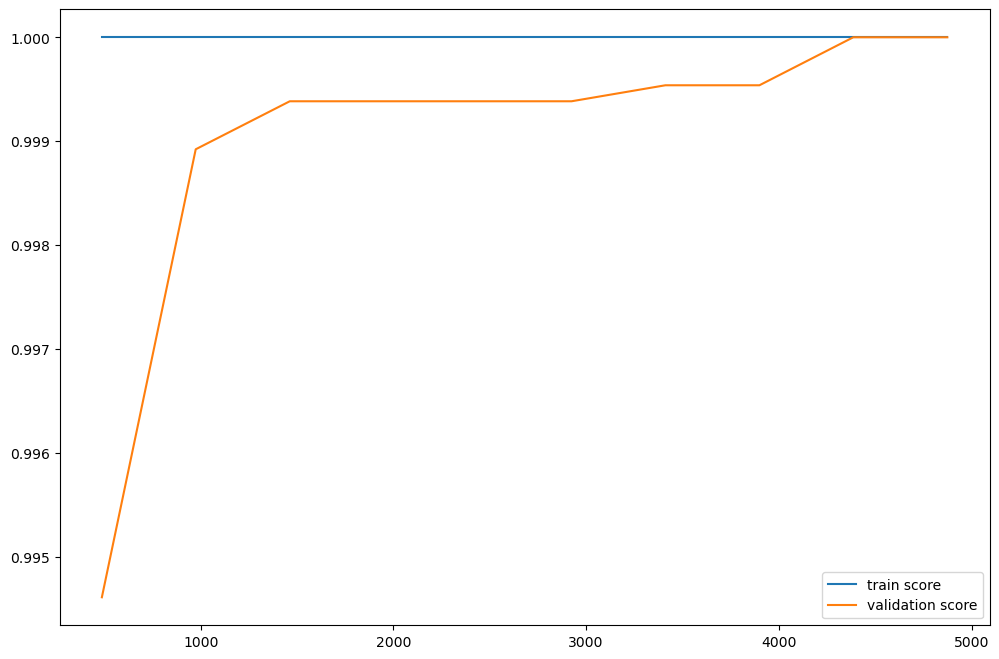

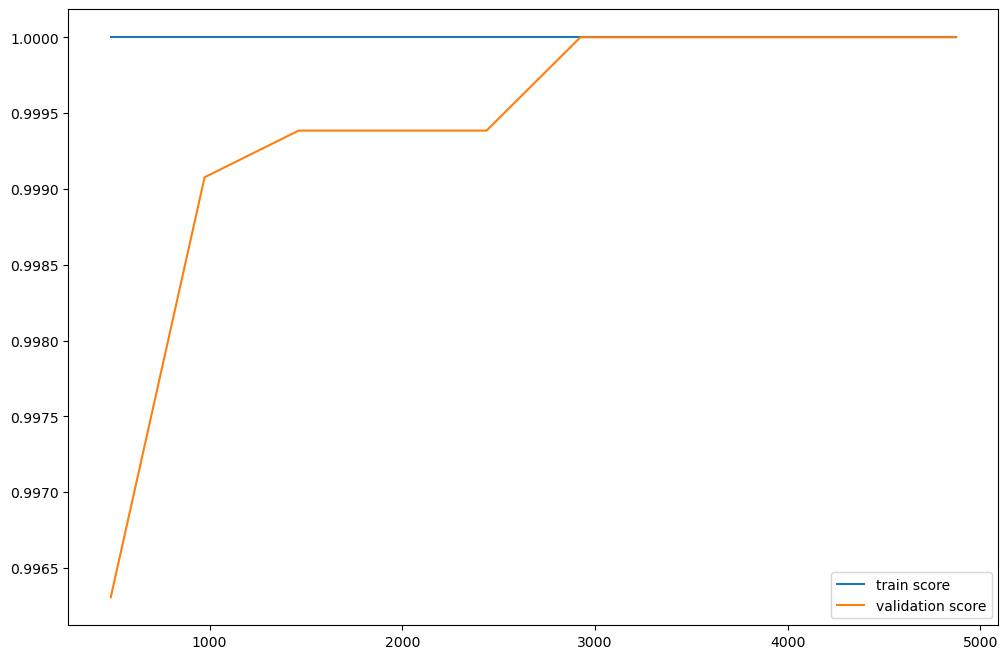

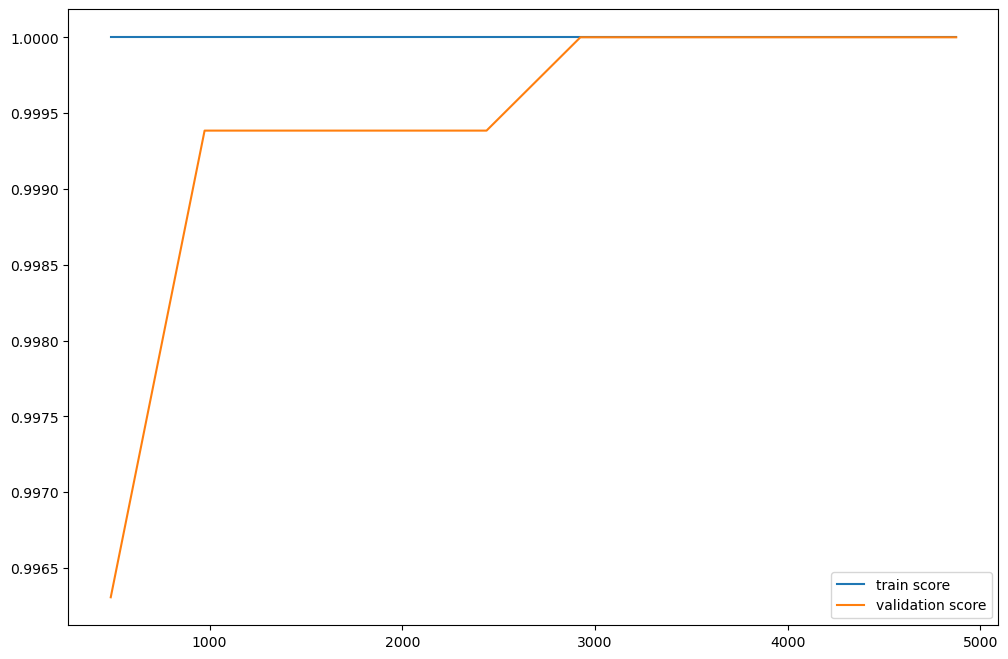

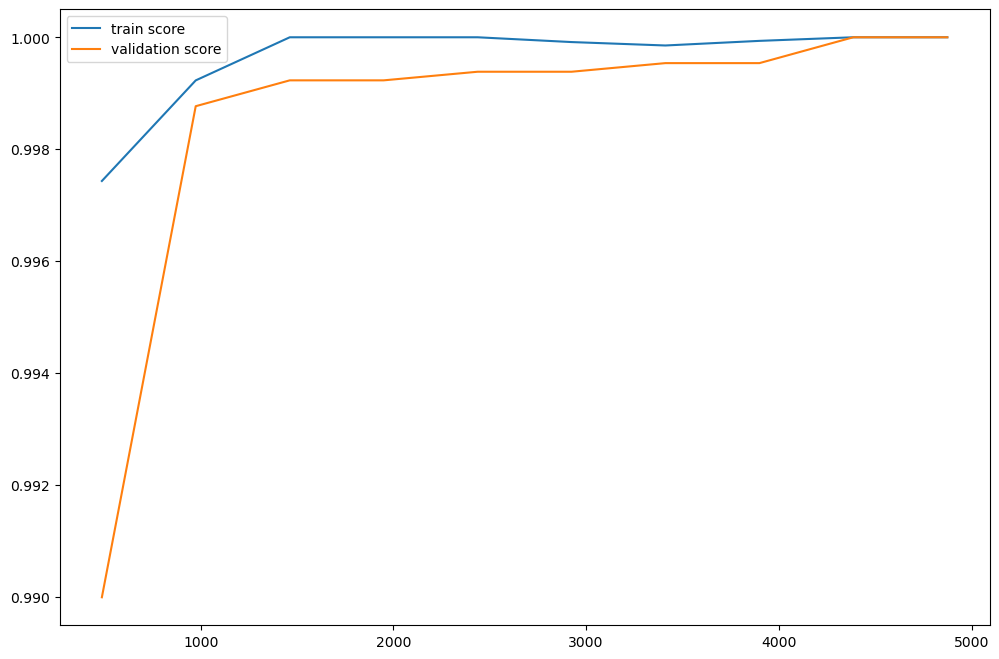

In [305]:
for model in model_dict.values():
    evaluation(model)

# Feature importance

------------- DecisionsTree ----------------
------------- RandomForest ----------------
------------- AdaBoost ----------------


<Figure size 640x480 with 0 Axes>

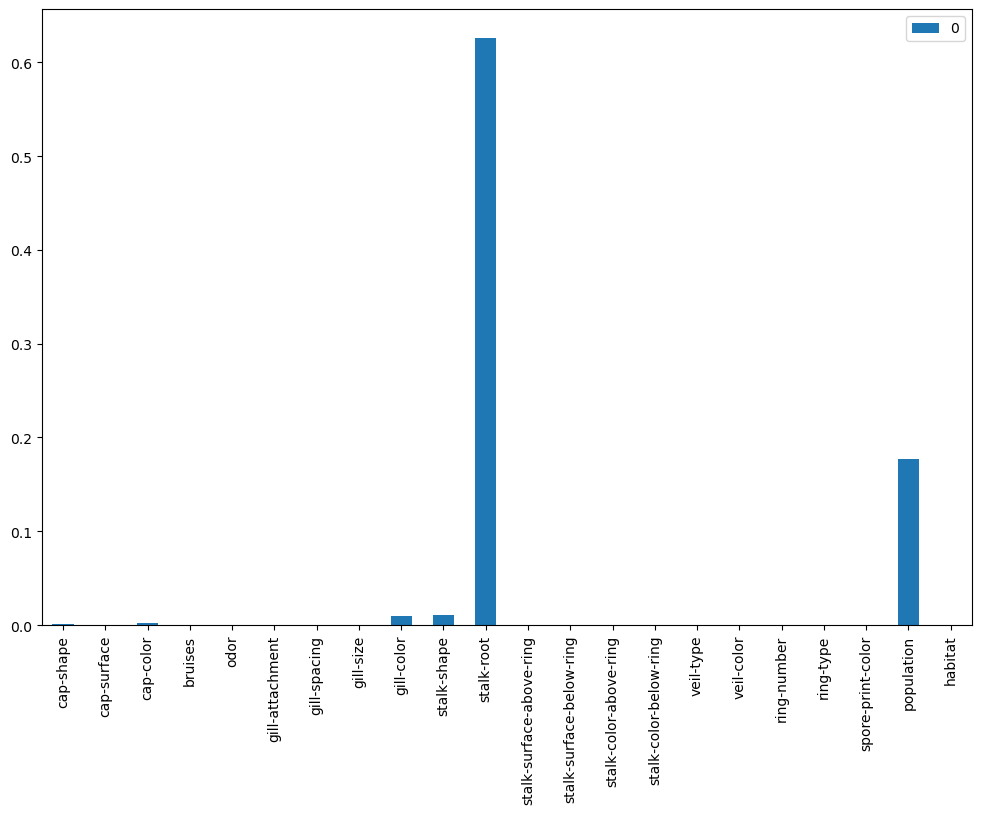

<Figure size 640x480 with 0 Axes>

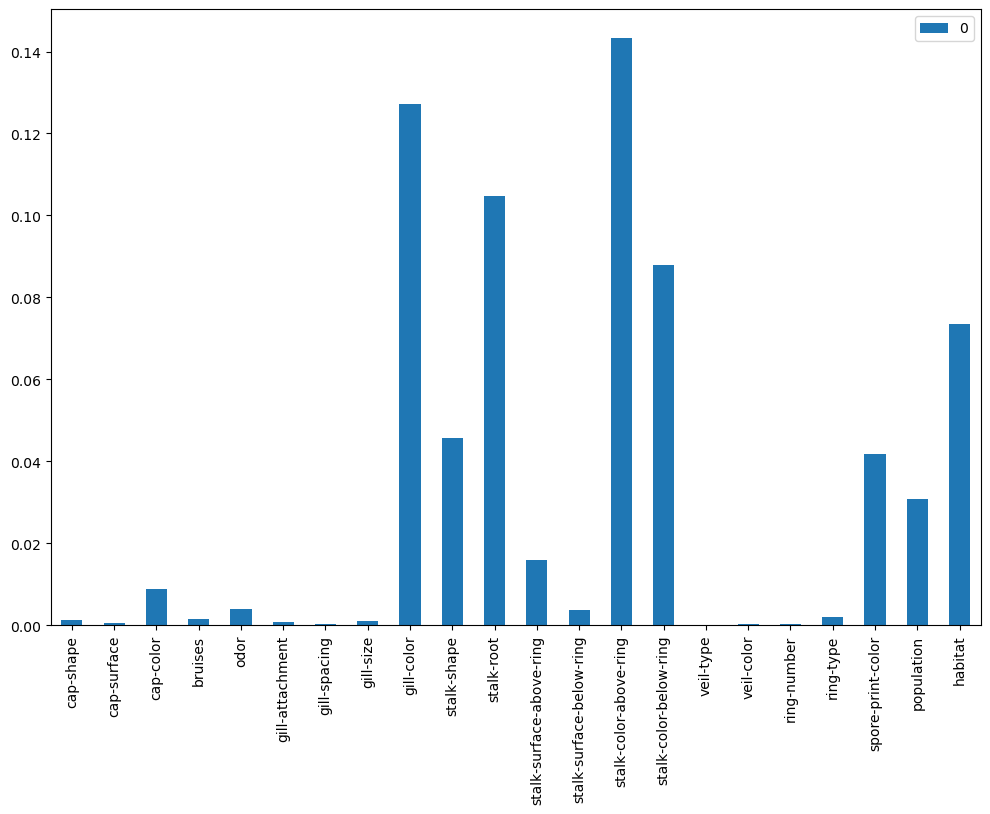

<Figure size 640x480 with 0 Axes>

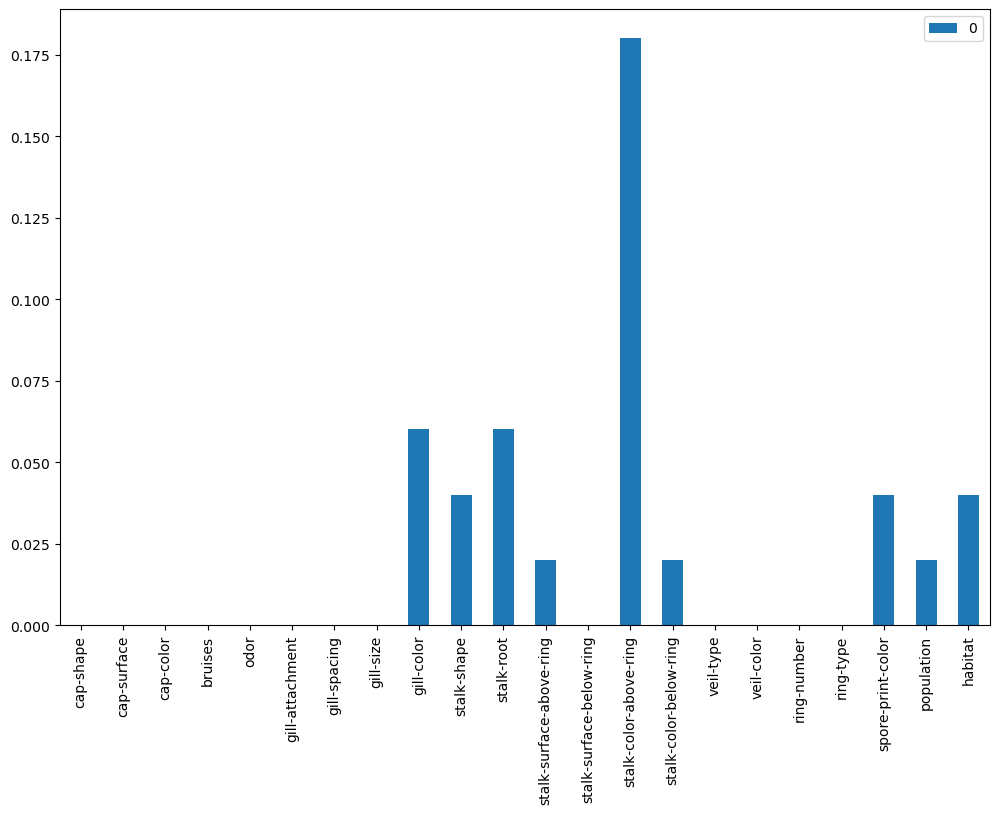

In [293]:
for name, model in model_dict.items():
    if (name != 'SVC') & (name != 'KNN'):
        plt.figure()
        print('-------------',name,'----------------')
        feature_names_original = encodeur.get_feature_names_out()
        feature_importances = model.feature_importances_
        feature_importances_named = dict(zip(feature_names_original, feature_importances))
        importances_aggregated = {}
        for feature in X.columns:
            feature_importance_values = [feature_importances_named[column] for column in feature_names_original if feature in column]
            importances_aggregated[feature] = sum(feature_importance_values)
        pd.DataFrame(importances_aggregated.values(), index = X.columns).plot.bar(figsize = (12,8))
        importances_aggregated.clear()